In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
#plt.rcParams["figure.figsize"] = (20,5)

In [3]:
BMI_df = pd.read_csv('HKQuantityTypeIdentifierBodyMassIndex.csv')
Mass_df = pd.read_csv('HKQuantityTypeIdentifierBodyMass.csv')
BodyFat_df = pd.read_csv('HKQuantityTypeIdentifierBodyFatPercentage.csv')
VO2_df = pd.read_csv('HKQuantityTypeIdentifierVO2Max.csv')

In [4]:
# clear out duplicate dates by time

In [5]:
BMI_df = BMI_df[['creationDate','value','unit']]
Mass_df = Mass_df[['creationDate','value','unit']]
BodyFat_df = BodyFat_df[['creationDate','value','unit']]
VO2_df = VO2_df[['creationDate','value','unit']]

In [43]:
BMI_df.creationDate= BMI_df.creationDate.astype('datetime64[ns]').dt.date
Mass_df.creationDate= Mass_df.creationDate.astype('datetime64[ns]').dt.date
BodyFat_df.creationDate= BodyFat_df.creationDate.astype('datetime64[ns]').dt.date
VO2_df.creationDate= VO2_df.creationDate.astype('datetime64[ns]').dt.date

In [7]:
BodyFat_df['value'] = BodyFat_df['value']*100

In [8]:
# set plotting parameters here. Plot all on same graph w/ different lines, or have sub-plots

In [44]:
BMI_grouped = BMI_df.groupby('creationDate').mean()
Mass_grouped = Mass_df.groupby('creationDate').mean()
BodyFat_grouped = BodyFat_df.groupby('creationDate').mean()
VO2_grouped = VO2_df.groupby('creationDate').mean()

Text(0.5, 0.98, 'Biometric Data')

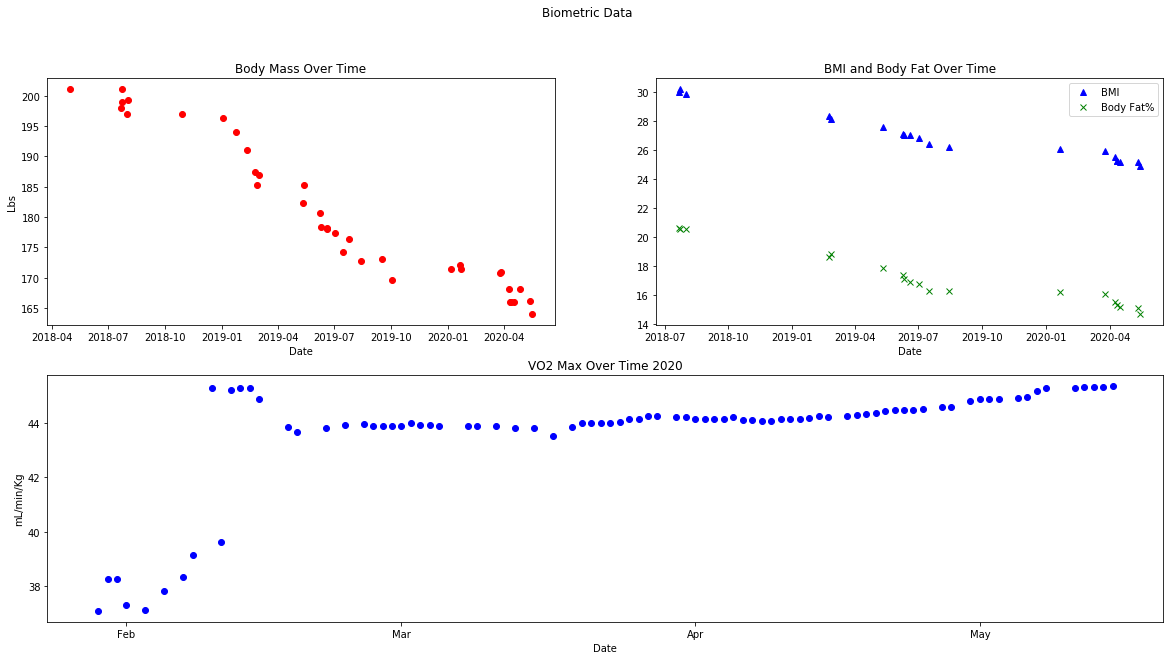

In [73]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((2,2), (0,0))

#fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(30,15)) # 1 by 2 matrix of subplots
ax1.set_title('Body Mass Over Time')
ax1.plot(Mass_grouped,'ro')
ax1.set_xlabel('Date')
ax1.set_ylabel('Lbs')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.plot(BMI_grouped, 'b^', label='BMI')
ax2.plot(BodyFat_grouped,'gx',label='Body Fat%')
ax2.set_title('BMI and Body Fat Over Time')
ax2.set_xlabel('Date')
ax2.legend()


ax3 = plt.subplot2grid((2,2), (1,0), colspan=2)
ax3.plot(VO2_grouped, 'bo')
ax3.set_title('VO2 Max Over Time 2020')
ax3.set_xlabel('Date')
ax3.set_ylabel('mL/min/Kg')
# Make ticks on occurrences of each month:
ax3.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# '%b' means month as locale’s abbreviated name
fig.suptitle('Biometric Data')


In [74]:
fig.savefig('Biometrics.pdf')